In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr
import imageio
import os
from matplotlib.colors import Normalize, LogNorm
import datetime


In [2]:
def plot_tmmn(day,ax):
  # Open the NetCDF file
    file_path = '../../data/tmmn.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)

    # Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    # req_thing = 'precipitation_amount'

    req_thing = 'air_temperature'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_celsius=t_max-273.15
    # Select a specific time step (for example, the first time step)
    t_max_slice= t_max_celsius[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    # #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Temperature (°C)')

    # Add title
    ax.set_title('Maximum Near-Surface Air Temperature over the USA - '+"day "+ day)

    # Show the plot
    # plt.show()

    # Close the dataset
    dataset.close()

In [3]:
def plot_srad(day,ax):
  # Open the NetCDF file
    file_path = '../../data/srad.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'surface_downwelling_shortwave_flux_in_air'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('SRAD')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [4]:
def plot_bi(day,ax,cmap):
  # Open the NetCDF file
    file_path = '../../data/bi.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'burning_index_g'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap=cmap, shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('BI')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [5]:
def plot_erc(day,ax):
  # Open the NetCDF file
    file_path = '../../data/erc.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'energy_release_component-g'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('ERC')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [6]:
def plot_fm100(day,ax):
  # Open the NetCDF file
    file_path = '../../data/fm100.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'dead_fuel_moisture_100hr'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('FM100')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [7]:
def plot_fm1000(day,ax):
  # Open the NetCDF file
    file_path = '../../data/fm1000.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'dead_fuel_moisture_1000hr'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('FM1000')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [8]:
def save_bi_images(days, colourmap):
    output_dir='other_viz'
    os.makedirs(output_dir, exist_ok=True)
    start_date = datetime.datetime(2024, 6, 1)  # Starting date (June 1, 2024)
    
    for day in days:
        fig, ax = plt.subplots(1, 1, figsize=(7, 8))
        plot_bi(day, ax, colourmap)
        
        # Calculate the current date based on the day index
        current_date = start_date + datetime.timedelta(days=day)
        date_str = current_date.strftime("%B %d")
        
        # Update the title
        ax.set_title(f"Burning Index over the USA - {date_str}")
        
        # Save the plot as an image file
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'day_{day:03d}_{colourmap}.png'),
                       dpi=300, bbox_inches='tight')
        plt.close(fig)

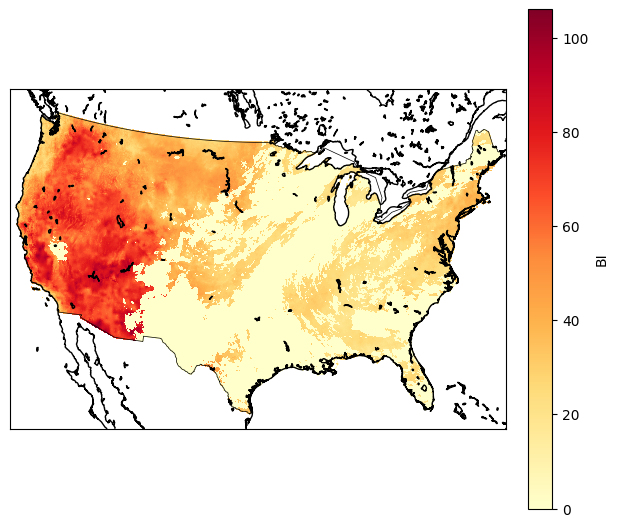

<Figure size 640x480 with 0 Axes>

In [9]:
days=[27]
# sequential_cmaps = ["viridis", "YlOrRd", "Reds", "plasma"]  # Sequential
# diverging_cmaps = ["RdBu_r", "coolwarm", "RdYlBu_r", "seismic"]  # Diverging
# perceptual_cmaps = ["magma", "inferno", "cividis"]  # Perceptually uniform
# colormaps=sequential_cmaps+diverging_cmaps+perceptual_cmaps
# for cmap in colormaps:
save_bi_images(days,'YlOrRd')